# Conceitos Básicos

Nesta primeira aula veremos:

* Definição de estatística
* População
* Amostra
* Medidas de Frequência

## Definição de Estatística

É a ciência que estuda os métodos de coleta, análise, organização, descrição, interpretação e apresentação de dados experimentais.

Os dados são obtidos com o intuito de responder um problema do mundo real.

A estatística subdivide-se em três grandes áreas:

* A estatística descritiva : parte da estatística voltada para a organização e descrição dos dados

* Probabilidade : útil para avaliar situações em que envolvem o acaso / aleatoriedade

* Inferência : refere-se à análise e interpretação dos dados

## População

Entender a diferença entre __População__ e __Amostra__ é importante para direcionar os nossos trabalhos em _Ciência de Dados_.

Definir uma população e saber se é possível trabalhar com todos os seus elementos é um dos principais pontos de partida para qualquer estudo. 

Na maioria dos casos utilizamos amostras em nossos estudos e é importante saber se aqueles dados selecionados representam ou não bem a população.

Assim: 

* __População__ : todo o conjunto de dados do estudo
Ex: toda a população do sudeste, todos os alunos de uma escola...

* __Amostra__ : uma parte da população, normalmente retirada para realizar análises descritivas e inferenciais com a possibilidade de extrapolar conclusões para a população
Ex: amostra estratificada dos estados do sudeste, os alunos do ensino fundamental...

> _Os estudos que determinam o que é a população e o que são as amostras!_

Vejamos esta afirmação acima:

**Ex**: Num estudo sobre toda a região sudeste, como citado acima, a população do Rio de Janeiro é uma amostra. Agora, se formos estudar a população do estado do Rio de Janeiro, o que antes era amostra, agora é a população!

Indo além, repare que no estudo sobre a população do estado do Rio de Janeiro, todos os seus cidadãos são a população, mas o município de Petrópolis será uma amostra deste estudo.

__VALE LEMBRAR__

Trazendo para nossa realidade, esta definição - se trabalharemos com a população ou não - passa muito pela tecnologia, seja ela infraestrutura (On Premises ou Cloud) ou bibliotecas (Pandas, PySpark etc), que estamos utilizando para realizarmos nossas análises.

Você reparou que todos os conceitos da estatística inferencial giram em torno desses conceitos? Se não reparou, repare! 

Muitas das técnicas estatísticas que utilizamos são justamente para saber se as características e padrões que encontramos na amostra também valem para toda a população.

__ATENÇÃO__ : Um erro de amostragem, ou uma conclusão errada, pode levar a uma extrapolação para a população que é totalmente incorreta.

### Você entende por que na maioria dos casos trabalhamos com amostras ao invés da população?

São diversos fatores, mas para citar alguns:

* Grande volume de dados (Big Data)
* Impossibilidade de acesso de todos os dados
* Custo para ter todos os dados analisados
* Maquinário disponível
* Tecnologia aplicada (já mencionada anteriormente)

Assim, precisamos trabalhar com amostras para tentarmos inferir se as análises podem se estender às populações.

## Amostra

É todo subconjunto de unidades retiradas de uma população. 

O processo de retirada de informações dos "n" elementos amostrais, deve seguir um método criterioso e adequado que são os tipos de amostragem.

Basicamente, existem amostras probabilísticas e não probabilísticas:

* __amostra probabilística__ : todos os elementos da população apresentam probabilidade maior que zero de serem selecionados (aleatória simples, estratificada, sistemática, e por conglomerados)

* __amostra não probabilística__ : quando não há probabilidade clara / conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental (acidental, intencional, por cotas)

### Técnicas de amostragens probabilísticas

* __Amostra Aleatória Simples (AAS)__

  A amostra aleatória simples pode ser realizada com ou sem reposição. 

  No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificarmos, suponha que se queira sortear um número aleatório de uma urna, se for uma _Amostra Aleatória Simples_ (AAS) com reposição, este número voltará para a urna para participar do próximo sorteio.

  Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra

  Ex: Urna, Dado

In [ ]:
import numpy as np

In [ ]:
# Com reposição

for _ in range(3):
  print(np.random.randint(1, 5))

2
2
1


In [ ]:
# Sem reposição

sorteados = []

for _ in range(3):
  numero = np.random.randint(1, 5)
  if numero not in sorteados:
    sorteados.append(numero)
    print(numero)

2
4
3


* __Amostra Estratificada__

  Neste tipo de amostragem, a população é dividida em estratos homogêneos (grupos com elementos de características comuns) e é selecionada uma amostra aleatória de cada estrato

In [ ]:
import pandas as pd 

np.random.seed(28012023)

exemplo_df = pd.DataFrame()

exemplo_df['Alunos'] = [ f'Aluno {num}' if np.random.choice(['Feminino', 'Masculino']) == 'Masculino' else f'Aluna {num}' for num in range(1,91) ]
exemplo_df['Sexo'] = exemplo_df['Alunos'].apply(lambda palavra: 'Feminino' if palavra[4] == 'a' else 'Masculino')

In [ ]:
amostra_estratificada = exemplo_df.groupby('Sexo')['Alunos'].count().to_frame('População')

amostra_estratificada

,População
Sexo,
Feminino,43
Masculino,47


In [ ]:
amostra_estratificada['10%'] = amostra_estratificada['População'] * 0.10
amostra_estratificada

,População,10%
Sexo,,
Feminino,43,4.3
Masculino,47,4.7


In [ ]:
amostra_estratificada['Amostra'] = amostra_estratificada['10%'].round()
amostra_estratificada

,População,10%,Amostra
Sexo,,,
Feminino,43,4.3,4.0
Masculino,47,4.7,5.0


* __Amostra Sistemática__

  Os elementos são selecionados seguindo uma regra pré-definida

In [ ]:
import pandas as pd
import numpy as np

casas_df = pd.DataFrame()

casas_df['Casas'] = [f'Casa {num:0>3}' for num in range(1, 901)]

qtde_casas = int(input('Quantas casas deseja selecionar? '))
passo = int(casas_df.shape[0] / qtde_casas)

inicio = np.random.randint(casas_df.shape[0])
amostra_sys = [ num for num in range(inicio, casas_df.shape[0] + 1, passo) ]
while max(amostra_sys) > 900 or len(amostra_sys) < qtde_casas: 
  inicio = np.random.randint(casas_df.shape[0])
  amostra_sys = [ num for num in range(inicio, casas_df.shape[0] + 1, passo) ]

# amostra_sys
amostra_sys_tratada = list(map(lambda pos: pos - 1, amostra_sys))
casas_df.iloc[amostra_sys_tratada, :]

Quantas casas deseja selecionar? 50


[4,
 22,
 40,
 58,
 76,
 94,
 112,
 130,
 148,
 166,
 184,
 202,
 220,
 238,
 256,
 274,
 292,
 310,
 328,
 346,
 364,
 382,
 400,
 418,
 436,
 454,
 472,
 490,
 508,
 526,
 544,
 562,
 580,
 598,
 616,
 634,
 652,
 670,
 688,
 706,
 724,
 742,
 760,
 778,
 796,
 814,
 832,
 850,
 868,
 886]

In [ ]:
amostra_sys_tratada = list(map(lambda pos: pos - 1, amostra_sys))
casas_df.iloc[amostra_sys_tratada, :]

,Casas
3,Casa 004
21,Casa 022
39,Casa 040
57,Casa 058
75,Casa 076
93,Casa 094
111,Casa 112
129,Casa 130
147,Casa 148
165,Casa 166


* __Amostra por conglomerados__

  Neste tipo de abordagem aleatória, a população (extensa) é dividida em miniaturas da população (não homogêneas) e seleciona-se uma amostra aleatória desses conglomerados

Indo além do que falamos acima, a amostra por conglomerados é uma técnica que explora a existência de grupos (clusters) na população.

Esses grupos representam __adequadamente__ a população total em relação a característica que se deseja medir. Logo estes grupos contêm variabilidade da população inteira. 

Com isso, pode-se selecionar apenas alguns desses conglomerados para realizarmos o nosso estudo.

Olhando pelo prisma de _vantagens_ e _desvantagens_ temos:

* Principal vantagem é a parte operacional. Selecionar um conglomerado costuma ser mais fácil e mais barato do que fazer uma amostra aleatória ou sistemática. Usar clusters geográficos pode representar uma economia significativa no deslocamento

* Principal desvantagem é o risco dos clusters não serem realmente homogêneos entre eles

In [ ]:
# Conglomerados ou sub-populações

In [ ]:
# Exemplo da sopa para saber se está bom de sal ou não 

# Exame de sangue 

## Parte 2

A __estatística__ é uma parte da matemática aplicada que fornece métodos para coleta, organização, descrição, análise, e interpretação de dados e para a utilização na tomada de decisões.

Independente do método de obtenção (amostragem), os dados precisam ser explorados e interpretados para atingir os resultados desejados.

A coleta, a organização, a descrição dos dados, o cálculo e a interpretação de coeficientes pertencem à __ESTATÍSTICA DESCRITIVA__.

A análise e interpretação dos dados, associado a uma margem de incerteza, ficam a cargo da __ESTATÍSTICA INDUTIVA ou INFERENCIAL__, também, chamada como a medida da incerteza ou métodos que se fundamentam na teoria da probabilidade.

A exploração desses dados consiste em organizá-los em tabelas e gráficos, disponíveis para cada tipo específico de dados: qualitativos e quantitativos.



### Tipos de Dados

```
Dados
     |
     Categorizados / Categóricos (Qualitativos)
     |                                        |
     |                                        Nominais
     |                                        |
     |                                        Ordinais
     |
     Numéricos (Quantitativos)
                             |
                             Discretos
                             |
                             Contínuos
```

__Dados categóricos__ (Ex: cor dos olhos, escolaridade) 

* __Dado categórico norminal__ : não são apresentados de forma numérica e não seguem uma ordem (Ex: sexo, cor dos olhos)

* __Dado categórico ordinal__ : aqui existe uma ordem e conseguimos estabelecer uma relação (Ex: escolaridade, pesquisa de satisfação) 

* __Dado númerico contínuo__ : pode assumir qualquer valor dentro de um intervalo (Ex: altura de uma pessoa, salário)

* __Dado númerico discreto__ : pode assumir apenas um valor dentro de um intervalo (Ex: número de filhos)

### Construção de Tabelas

Uma tabela é um quadro que resume um conjunto de observações. Toda tabela tem que ter:

* __Título__ : explica o conteúdo da tabela

* __Corpo__ : conjnto de linhas e colunas que contém informações sobre a variável em estudo 

* __Cabeçalho__ : parte superior da tabela que especifica o conteúdo das colunas 

* __Coluna indicadora__ : parte da tabela que especifica o conteúdo das linhas

* __Casa ou células__ : espaço destinado a um só número, interseção de uma linha com uma coluna

* __Linha__ : série de células organizadas horizontalmente

* __Coluna__ : série de células organizadas verticalmente

* __Rodapé__ : é um elemento complementar que pode conter fonte, notas ou chamadas



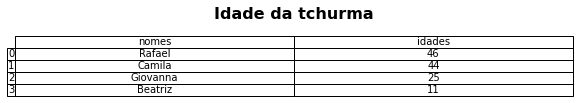

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'nomes': ['Rafael', 'Camila', 'Giovanna', 'Beatriz'],
    'idades': [46, 44, 25, 11]
})


#initialize figure
# fig = plt.figure(figsize = (8, .2))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(10, .2))

#create table
ax.table(cellText = df.values, rowLabels = df.index, 
         colLabels = df.columns, cellLoc='center')

#add title to table
ax.set_title('Idade da tchurma', fontweight='bold', fontsize=16)

#turn axes off
ax.axis('off')

plt.show()

## Medidas de Frequência

As informações mais básicas que precisamos obter da nossa base de dados, sãos as medidas de frequência.

As medidas de frequência são as informações de quantidade, contagem, porcentagem dos dados das populações a amostras analisadas.

> Entender as quantidades e percentuais parece óbvio, mas em __Ciência de Dados__, a análise exploratória é muitas vezes deixada de lado, comprometendo o conhecimento dos dados analisados

Uma das principais formas de utilizar medidas de frequência são em modelos preditivos, onde precisamos avaliar se as classes que estamos tentando prever estão desbalanceadas.

As medidas de frequências podem ser absolutas ou relativcas.

  * Frequências absolutas : contagens simples, sem relacionar os dados com o todo ou com outras informações

  * Frequências relativas : são aquelas contagens relacionadas com o todo ou com outras informações

In [ ]:
quilos = [41, 41, 41, 42, 42, 43, 44, 45, 46, 46, 50, 50, 51, 52, 54, 57, 58, 58, 60, 60]

bins = [0, 44, 48, 52, 56, 61]
labels = ['41 |-- 45', '45 |-- 49', '49 |-- 53', '53 |-- 57', '57 |-- 61']

df = pd.DataFrame(quilos, columns=['Quilos'])
df.value_counts(sort=False)

Quilos
41        3
42        2
43        1
44        1
45        1
46        2
50        2
51        1
52        1
54        1
57        1
58        2
60        2
dtype: int64

In [ ]:
df['Intervalo de classe'] = pd.cut(df['Quilos'], bins=bins, labels=labels)
df2 = df.value_counts(subset='Intervalo de classe', sort=False).to_frame('Frequência absoluta').reset_index()
df2

,Intervalo de classe,Frequência absoluta
0,41 |-- 45,7
1,45 |-- 49,3
2,49 |-- 53,4
3,53 |-- 57,1
4,57 |-- 61,5


In [ ]:
from statistics import median

def calc_median(class_interval: str) -> int:
  return median(
      [num for num in range(
          int(class_interval[:2]), int(class_interval[-2:]) + 1
      )]
  )

df2.insert(2, 'Ponto médio', df2['Intervalo de classe'].apply(lambda ic: calc_median(ic)))
df2

,Intervalo de classe,Frequência absoluta,Ponto médio,Frequência relativa,Frequência acumulada,Frequência relativa acumulada
0,41 |-- 45,7,43,0.35,7,0.35
1,45 |-- 49,3,47,0.15,10,0.50
2,49 |-- 53,4,51,0.20,14,0.70
3,53 |-- 57,1,55,0.05,15,0.75
4,57 |-- 61,5,59,0.25,20,1.00


In [ ]:
df2['Frequência relativa'] = df2['Frequência absoluta'] / df2['Frequência absoluta'].sum()
df2

,Intervalo de classe,Frequência absoluta,Frequência relativa
0,41 |-- 45,7,0.35
1,45 |-- 49,3,0.15
2,49 |-- 53,4,0.20
3,53 |-- 57,1,0.05
4,57 |-- 61,5,0.25


In [ ]:
acc = 0 

def freq_acc(value: int) -> int:
  global acc 
  acc += value
  return acc 

df2['Frequência acumulada'] = df2['Frequência absoluta'].apply(lambda faa: freq_acc(faa))
df2

,Intervalo de classe,Frequência absoluta,Frequência relativa,Frequência acumulada
0,41 |-- 45,7,0.35,7
1,45 |-- 49,3,0.15,10
2,49 |-- 53,4,0.20,14
3,53 |-- 57,1,0.05,15
4,57 |-- 61,5,0.25,20


In [ ]:
df2['Frequência relativa acumulada'] = df2['Frequência acumulada'].apply(lambda fa: fa / df2['Frequência absoluta'].sum())
print('Peso dos alunos de uma escola\n'.upper())
display(df2)
print('\nFonte: Dados fictícios')

PESO DOS ALUNOS DE UMA ESCOLA



,Intervalo de classe,Frequência absoluta,Frequência relativa,Frequência acumulada,Frequência relativa acumulada
0,41 |-- 45,7,0.35,7,0.35
1,45 |-- 49,3,0.15,10,0.50
2,49 |-- 53,4,0.20,14,0.70
3,53 |-- 57,1,0.05,15,0.75
4,57 |-- 61,5,0.25,20,1.00



Fonte: Dados fictícios


## Antes de terminar...

A __estatística__ é a coleção de métodos para planejar experimentos, obter e organizar dados, resumí-los, analisá-los e interpretá-los e, assim, extrair conclusões a partir deles.

A estatística descritiva trata da organização, resumo e apresentação dos dados, a probabilidade trata dos eventos aleatórios e a estatística inferencial, busca a partir de uma amostra, obter conclusões sobre a popupalação.

A obtenção de uma amostra é o processo de amostragem, que pode ser um processo probabilístico ou não probabilístico.

Vimos as abordagens de amostragem probabilística, mas há também, abordagens não probabilísticas, que são alternativas em alguns casos específicos.

## Terminamos por hoje!